<a href="https://colab.research.google.com/github/Frantala/Data-Python/blob/main/An%C3%A1lisis_de_Aeropuertos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de un Dataframe creado sobre aeropuertos



In [6]:
#importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Creamos un  dataframe de todos los aeropuertos de la ciudad de seattle
airports = pd.DataFrame([
    ['Seattle-Tacoma', 'Seattle', 'USA', 15000],
    ['Portland', 'Portland', 'USA', 8000],
    ['Vancouver', 'Vancouver', 'Canada', 10000],
    ['Calgary', 'Calgary', 'Canada', 15500],
    ['Edmonton', 'Edmonton', 'Canada', 8000],
    ['Winnipeg', 'Winnipeg', 'Canada', 12500],
],columns=['NAME', 'CITY', 'COUNTRY', 'PEOPLE'])
airports

,NAME,CITY,COUNTRY,PEOPLE
0,Seattle-Tacoma,Seattle,USA,15000
1,Portland,Portland,USA,8000
2,Vancouver,Vancouver,Canada,10000
3,Calgary,Calgary,Canada,15500
4,Edmonton,Edmonton,Canada,8000
5,Winnipeg,Winnipeg,Canada,12500


In [8]:
#Mostramos solamente los primeros dos columnas del df
airports.head(2)

,NAME,CITY,COUNTRY,PEOPLE
0,Seattle-Tacoma,Seattle,USA,15000
1,Portland,Portland,USA,8000


In [9]:
# Mostramos la "forma" del df es decir sus filas y columnas
airports.shape

(6, 4)

In [10]:
#Mostramos informacion mas especificas del df que estamos analizando
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   NAME     6 non-null      object
 1   CITY     6 non-null      object
 2   COUNTRY  6 non-null      object
 3   PEOPLE   6 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 324.0+ bytes


In [11]:
#Mostramos una columna en especifico del Df
airports['CITY']

0      Seattle
1     Portland
2    Vancouver
3      Calgary
4     Edmonton
5     Winnipeg
Name: CITY, dtype: object

In [12]:
#Devolvemos un valor en especifico con iloc
airports.iloc[2,1]

'Vancouver'

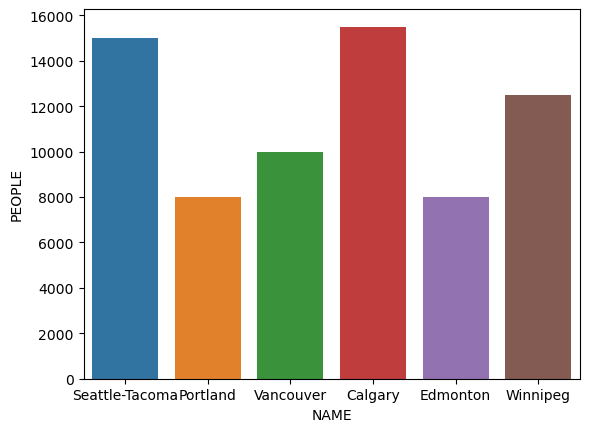

In [13]:
#Creamos un grafico de barras para visualizar los datos
sns.barplot(x='NAME', y='PEOPLE', data=airports)

#mostrando el grafico
plt.show()

In [14]:
#accediendo a un valor en especifico con loc
airports.loc[1]

NAME       Portland
CITY       Portland
COUNTRY         USA
PEOPLE         8000
Name: 1, dtype: object

In [15]:
# utilizando slicing para obtener una cantidad de datos del dataframe
airports[2:6]

,NAME,CITY,COUNTRY,PEOPLE
2,Vancouver,Vancouver,Canada,10000
3,Calgary,Calgary,Canada,15500
4,Edmonton,Edmonton,Canada,8000
5,Winnipeg,Winnipeg,Canada,12500


In [16]:
# utlizamos la propiedad sort_values para ordenarlo de forma descendente
df_ordenado = airports.sort_values(by='PEOPLE', ascending=False)
df_ordenado

,NAME,CITY,COUNTRY,PEOPLE
3,Calgary,Calgary,Canada,15500
0,Seattle-Tacoma,Seattle,USA,15000
5,Winnipeg,Winnipeg,Canada,12500
2,Vancouver,Vancouver,Canada,10000
1,Portland,Portland,USA,8000
4,Edmonton,Edmonton,Canada,8000


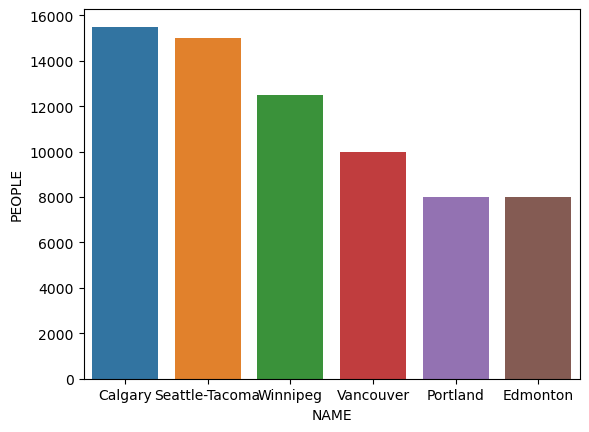

In [17]:
# grafico pero ahora con el dataframe ordenado
sns.barplot(x='NAME', y='PEOPLE', data=df_ordenado)
plt.show()

In [18]:
# Creamos un nuevo Dataframe
airports_2 = pd.DataFrame([
    ['Leipzig', 'Leipzig', 'Germany', 10000],
    ['Berlin', 'Berlin', 'Germany', 20000],
    ['London', 'London', 'United Kingdom', 30000],
    ['Paris', 'Paris', 'France', 40000],
    ['Madrid', 'Madrid', 'Spain', 50000],
], columns=['NAME', 'CITY', 'COUNTRY', 'PEOPLE'])
airports_2

,NAME,CITY,COUNTRY,PEOPLE
0,Leipzig,Leipzig,Germany,10000
1,Berlin,Berlin,Germany,20000
2,London,London,United Kingdom,30000
3,Paris,Paris,France,40000
4,Madrid,Madrid,Spain,50000


In [19]:
#Concatenando los 2 dataframes
airports_concat = pd.concat([airports, airports_2])
airports_concat

,NAME,CITY,COUNTRY,PEOPLE
0,Seattle-Tacoma,Seattle,USA,15000
1,Portland,Portland,USA,8000
2,Vancouver,Vancouver,Canada,10000
3,Calgary,Calgary,Canada,15500
4,Edmonton,Edmonton,Canada,8000
5,Winnipeg,Winnipeg,Canada,12500
0,Leipzig,Leipzig,Germany,10000
1,Berlin,Berlin,Germany,20000
2,London,London,United Kingdom,30000
3,Paris,Paris,France,40000


In [20]:
#Obteniendo datos estadisticos del dataframe concatenado
airports_concat.describe()

,PEOPLE
count,11.000000
mean,19909.090909
std,14104.641402
min,8000.000000
25%,10000.000000
50%,15000.000000
75%,25000.000000
max,50000.000000


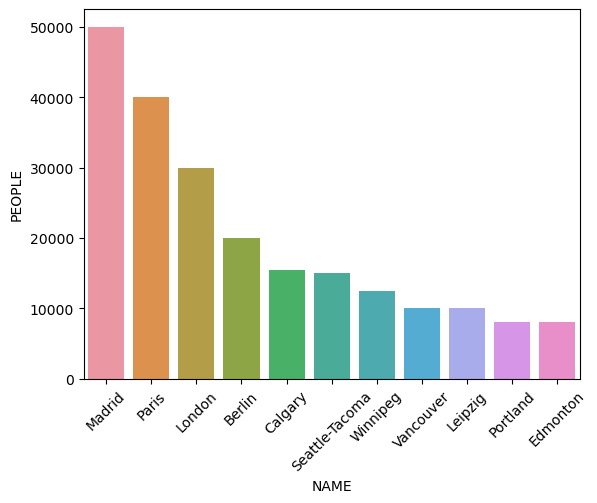

In [21]:
# grafico del df concatenado completo pero de forma descendente
sns.barplot(x='NAME', y='PEOPLE', data=airports_concat.sort_values(by='PEOPLE', ascending=False))
plt.xticks(rotation=45)
plt.show()

### Creación de un Mapa para visualizar los lugares geograficos de los aeropuertos
Utilizaremos Plotly para crear un DataFrame con las coordenadas de los aeropuertos

In [26]:
import geopandas as gpd
import plotly.express as px

In [29]:
# Colocamos las latitudes y longitudes de los aeropuertos para luego colocarlos en el mapa

airports['lat'] = [47.4490, 45.5234, 49.2827, 51.0447, 53.5461, 49.8951]
airports['lon'] = [-122.3093, -122.6750, -123.1207, -114.0719, -113.4909, -97.1384]

In [27]:
# Convertir el DataFrame a un GeoDataFrame
gdf = gpd.GeoDataFrame(
    airports,
    geometry=gpd.points_from_xy(airports.lon, airports.lat),
    crs="EPSG:4326"  # Coordenadas geográficas (latitud, longitud)
)


In [28]:
# Crear el mapa con Plotly
fig = px.scatter_geo(gdf,
                    lat="lat",
                    lon="lon",
                    hover_name="NAME",
                    size="PEOPLE",
                    color="COUNTRY",
                    projection="orthographic")

fig.update_layout(
    title='Aeropuertos en Norteamérica',
    showlegend=True
)

fig.show()

## Exportamos todo a un Excel 
Utlizacion de la funcion de Pandas llamada "to_excel"

In [17]:
airports_concat.to_excel('Airports.xlsx', sheet_name="Datos Aeropuertos") 
#lo que hacemos es pasarle un archvio excel en este caso no existe, pero lo creamos